# COGS 138 Final Project

## Names

- Fatima Enriquez
- Ashley Chavarria
- Tiffany Gunawan
- Hiroki Ito

## Reseach Question

How does the pattern of brain atrophy differ between patients with Alzheimer’s disease and healthy controls, and can these differences be used to prototype a predictive model to predict disease progression?

## Background & Prior Work

Our group’s decision to focus on brain atrophy in Alzheimer’s patients is per our discussion for a need to create better diagnostic and prognostic tools in managing this debilitating condition. Alzheimer's is a very common type of dementia with progressive symptoms, starting with mild memory loss and possibly leading to the loss of ability to carry on a conversation and respond to your general surroundings. According to the CDC, scientists do not fully know what causes Alzheimer’s disease, but there are multiple factors that can affect each person differently: age, family history, changes in the brain, and possibly education, diet, and environment. Most of what is known are the symptoms of Alzheimer’s, typically regarding memory problems being the first warning sign followed by difficulty completing familiar tasks, misplacing things, and changes in mood and behavior. [(CDC, 2020)](https://www.cdc.gov/aging/aginginfo/alzheimers.htm)

From what we knew before, there is no single test that can determine if a person is living with Alzheimer’s. Doctors employ a range of diagnostic methods for diagnosing including an integration of medical history, neurological exams, cognitive assessments, brain imaging, and blood examinations to make an accurate diagnosis. Recently, however, there has been a new usage of biomarkers to help diagnose Alzheimer’s disease, particularly focusing on brain imaging. According to the National Institute on Aging, brain scans are allowing doctors to see different factors that may help in diagnosis via CT, MRI, and PET scan. [(NIA, 2022)](https://www.nia.nih.gov/health/alzheimers-symptoms-and-diagnosis/how-biomarkers-help-diagnose-dementia#types_biomarkers_tests) Our group specifically wanted to focus on MRI for this project due to its versatility. 
    
Magnetic resonance imaging is a noninvasive technique that uses magnetic fields and radio waves to produce detailed images of body structures, and similar to CT scans, MRIs can show areas of the brain that have shrunk. Additionally, repeated MRIs can show a person’s brain changes over time, which may lead to evidence of shrinkage and can be used in many diagnoses. [(John Hopkins Medicine, 2024)](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/magnetic-resonance-imaging-mri) This has our group wondering, if MRIs can be used to note shrinkage in the brain, and according to the NIA, Alzheimer’s results as neuronal death which can affect the brain via tissue death and shrinkage, then we can possibly use MRI as a predictive method for Alzheimer's disease.

For this project, we chose to separate it into two parts. 

1. Comparisons in normal brain volume and demented brain volume
2. Computer vision application of multiple fMRI images of patients to prototype a predictive model for the prediction of Alzheimer's Disease

## Installations

In [1]:
# pip install seaborn
# pip install Pillow
# pip install opencv-python
# pip install tensorflow

## Imports: 

In [2]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf

from PIL import Image
import glob, os

from pathlib import Path
import imghdr

import cv2
from pathlib import Path

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array




/Users/fatimaenriquez/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-06-03 15:55:31.421289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Overview: 

The dataset below is the exact same as the oasis datasets...

#### Dataset #1
- Name: Oasis_cross_sectional
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-1/
- Number of observations: 436
- Number of variables: 12
- Variables of interest: gender (M/F), volume (eTIV, nWBV)

In [4]:
oasis_cross_sectional=pd.read_csv('Dataset_logs/oasis_cross-sectional.csv')

In [5]:
oasis_cross_sectional.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [6]:
oasis_cross_sectional.shape

(436, 12)

In [7]:
oasis_cross_sectional.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [8]:
oasis_cross_sectional.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [9]:
# Since we only care about sex and brain volume, we will drop all other columns
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_cross_sectional=oasis_cross_sectional.drop(columns=['Age','Hand', 'Educ', 'SES', 'MMSE', 'CDR', 'ASF', 'Delay', 'eTIV'])
oasis_cross_sectional=oasis_cross_sectional.sort_values('M/F', ascending=False)
oasis_cross_sectional.head()

,ID,M/F,nWBV
134,OAS1_0144_MR1,M,0.865
119,OAS1_0129_MR1,M,0.846
121,OAS1_0131_MR1,M,0.824
122,OAS1_0132_MR1,M,0.850
300,OAS1_0332_MR1,M,0.762


In [10]:
# Descriptive statistics for nWBV
# Note the lowest brain volume detected was 0.644 and the max was 0.89 between male and female

oasis_cross_sectional.describe(include=[np.number])

,nWBV
count,436.000000
mean,0.791670
std,0.059937
min,0.644000
25%,0.742750
50%,0.809000
75%,0.842000
max,0.893000


#### Dataset #2
- Name: Oasis_longitudinal_demographics
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-2/
- Number of observations: 373
- Number of variables: 15
- Variables of interst: demented/nondemented (Group), gender (M/F), age (Age), volume (eTIV, nWBV)

In [12]:
oasis_longitudinal_demographics=pd.read_csv('Dataset_logs/oasis_longitudinal_demographics.csv')

In [13]:
oasis_longitudinal_demographics.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [14]:
oasis_longitudinal_demographics.shape

(373, 15)

In [15]:
oasis_longitudinal_demographics.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [16]:
oasis_longitudinal_demographics.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [17]:
# Since we only care about sex and brain volume, we will drop all other columns
# Removing rows of nondemented patients, as our focus is on people who are already demented
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_longitudinal_demographics=oasis_longitudinal_demographics[oasis_longitudinal_demographics['Group'] != 'Nondemented']
oasis_longitudinal_demographics=oasis_longitudinal_demographics.drop(columns=['Subject ID', 'Group','Age', 'Visit', 'MR Delay', 'Hand', 'EDUC', 'SES', 'MMSE', 'CDR', 'ASF', 'eTIV'])
oasis_longitudinal_demographics=oasis_longitudinal_demographics.sort_values('M/F', ascending=False)
oasis_longitudinal_demographics.head()

,MRI ID,M/F,nWBV
2,OAS2_0002_MR1,M,0.736
123,OAS2_0058_MR1,M,0.707
261,OAS2_0127_MR1,M,0.729
257,OAS2_0124_MR2,M,0.750
256,OAS2_0124_MR1,M,0.749


In [18]:
# Renaming columns to match

oasis_longitudinal_demographics=oasis_longitudinal_demographics.rename(columns={'MRI ID':'ID'})

In [19]:
# Descriptive statistics for nWBV
# Note the lowest brain volume detected was 0.646 and the max was 0.81 between male and female

oasis_longitudinal_demographics.describe(include=[np.number])

,nWBV
count,183.000000
mean,0.717803
std,0.032696
min,0.646000
25%,0.695000
50%,0.713000
75%,0.738000
max,0.806000


In the cell below, to make the dataset easier to work with, we will merge the dataset between the 'M/F' and 'nWBV' columns. This will give us a combined view fo teh gender and normalied brain volume data, allowing streamlined analysis and comparisons across these attributes.

In [20]:
# Merging the two datasets on sex and brain volume

brain_volume = pd.merge(oasis_cross_sectional, oasis_longitudinal_demographics, on=['M/F', 'nWBV'])
brain_volume

,ID_x,M/F,nWBV,ID_y
0,OAS1_0134_MR1,M,0.665,OAS2_0162_MR2
1,OAS1_0351_MR1,M,0.665,OAS2_0162_MR2
2,OAS1_0399_MR1,M,0.706,OAS2_0058_MR2
3,OAS1_0399_MR1,M,0.706,OAS2_0037_MR4
4,OAS1_0138_MR1,M,0.706,OAS2_0058_MR2
...,...,...,...,...
121,OAS1_0221_MR1,F,0.696,OAS2_0018_MR4
122,OAS1_0221_MR1,F,0.696,OAS2_0079_MR3
123,OAS1_0221_MR1,F,0.696,OAS2_0031_MR3
124,OAS1_0210_MR1,F,0.722,OAS2_0106_MR1


In [22]:
dementia_dataset = pd.read_csv('Dataset_logs/dementia_dataset.csv') 
dementia_dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Exploratory Data Analysis

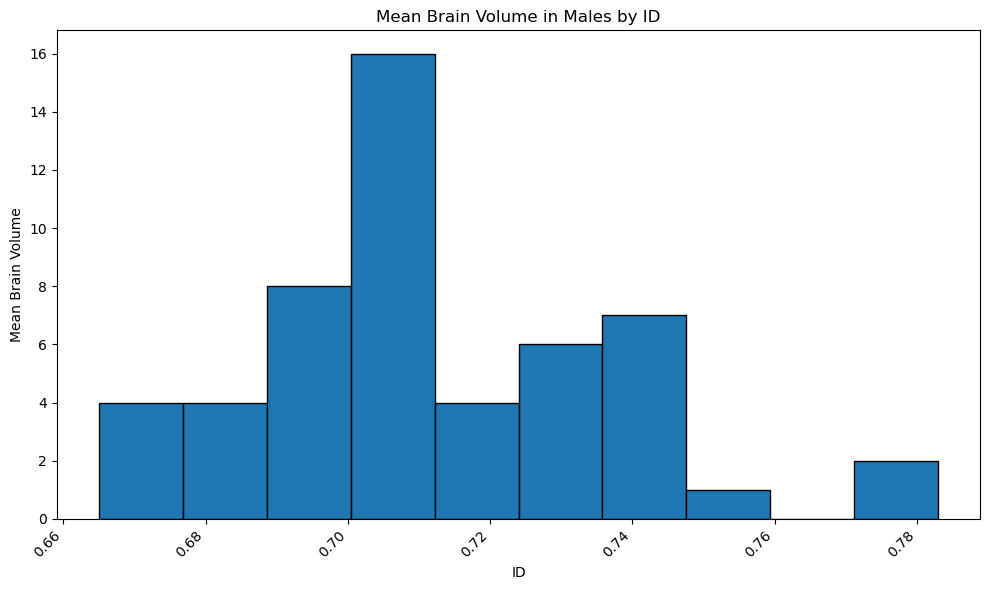

In [25]:
male_data=brain_volume[brain_volume['M/F']=='M']
mean_nWBV=male_data.groupby(['ID_x', 'ID_y'])['nWBV'].mean()
plt.figure(figsize=(10, 6))
mean_nWBV.plot(kind='hist', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Mean Brain Volume')
plt.title('Mean Brain Volume in Males by ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

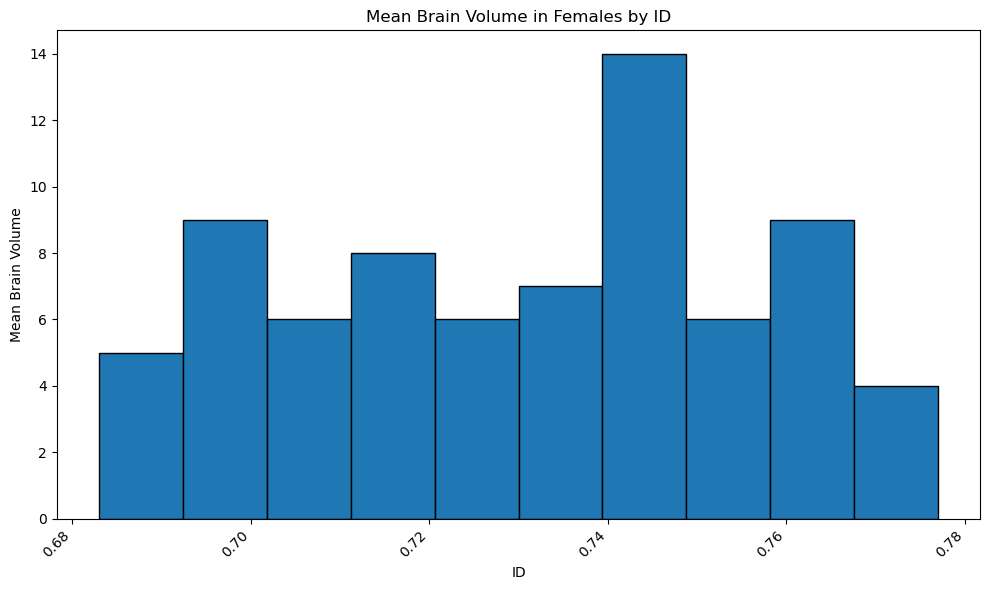

In [26]:
female_data=brain_volume[brain_volume['M/F']=='F']
mean_nWBV=female_data.groupby(['ID_x', 'ID_y'])['nWBV'].mean()
plt.figure(figsize=(10, 6))
mean_nWBV.plot(kind='hist', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Mean Brain Volume')
plt.title('Mean Brain Volume in Females by ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    brain_volume[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(brain_volume[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

/Users/fatimaenriquez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


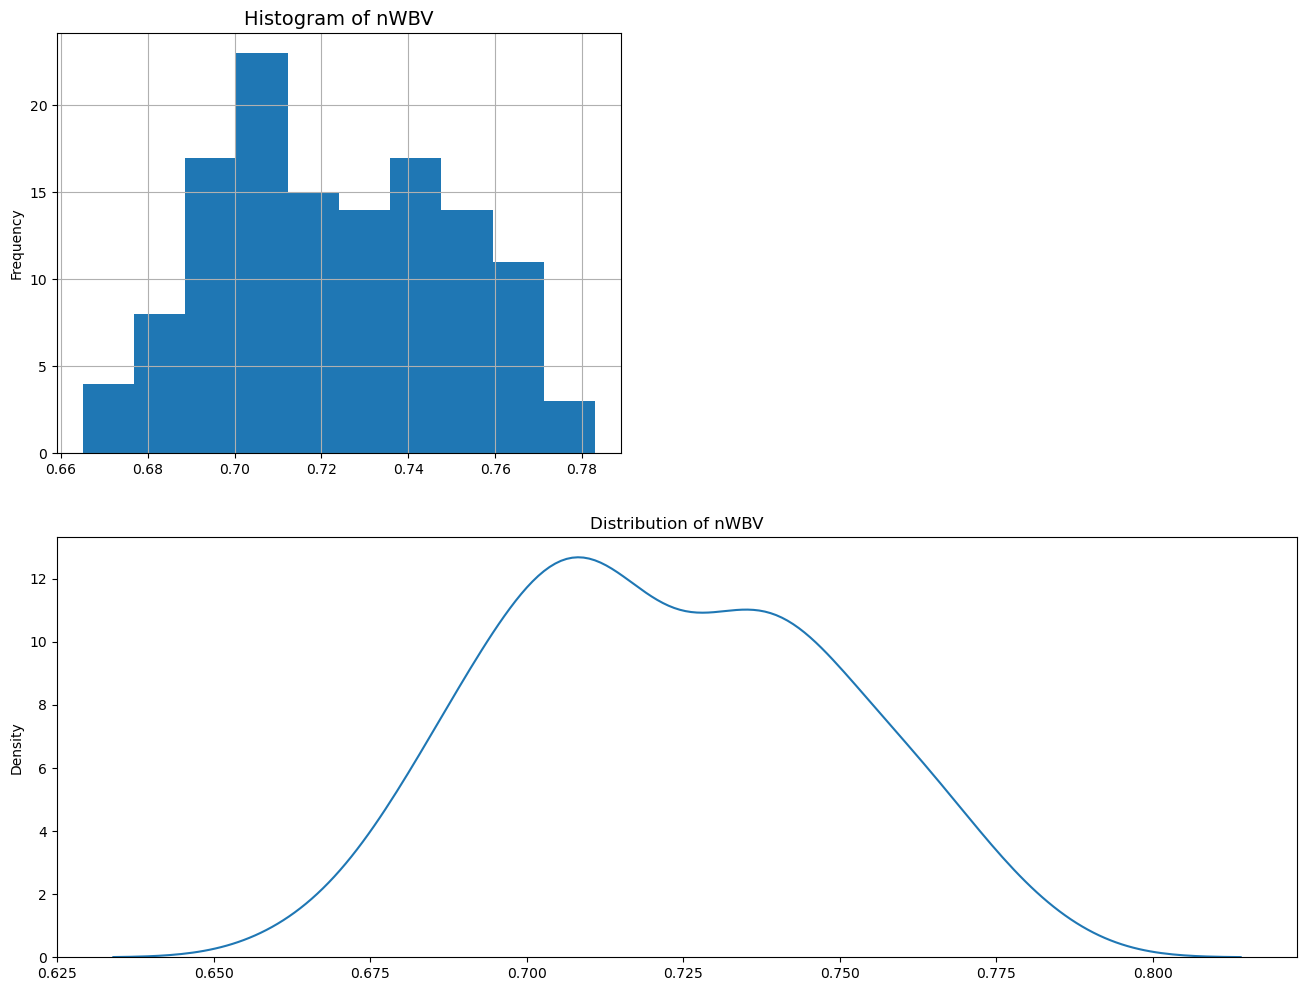

count    52.000000
mean      0.711327
std       0.025152
min       0.665000
25%       0.695000
50%       0.709000
75%       0.728000
max       0.783000
Name: nWBV, dtype: float64

In [29]:
# From the univariate analysis, we can see that males with dementia commonly have a brain volume of 0.70 +/- (x)

univariate_mul('nWBV')
male_data['nWBV'].describe()

/Users/fatimaenriquez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


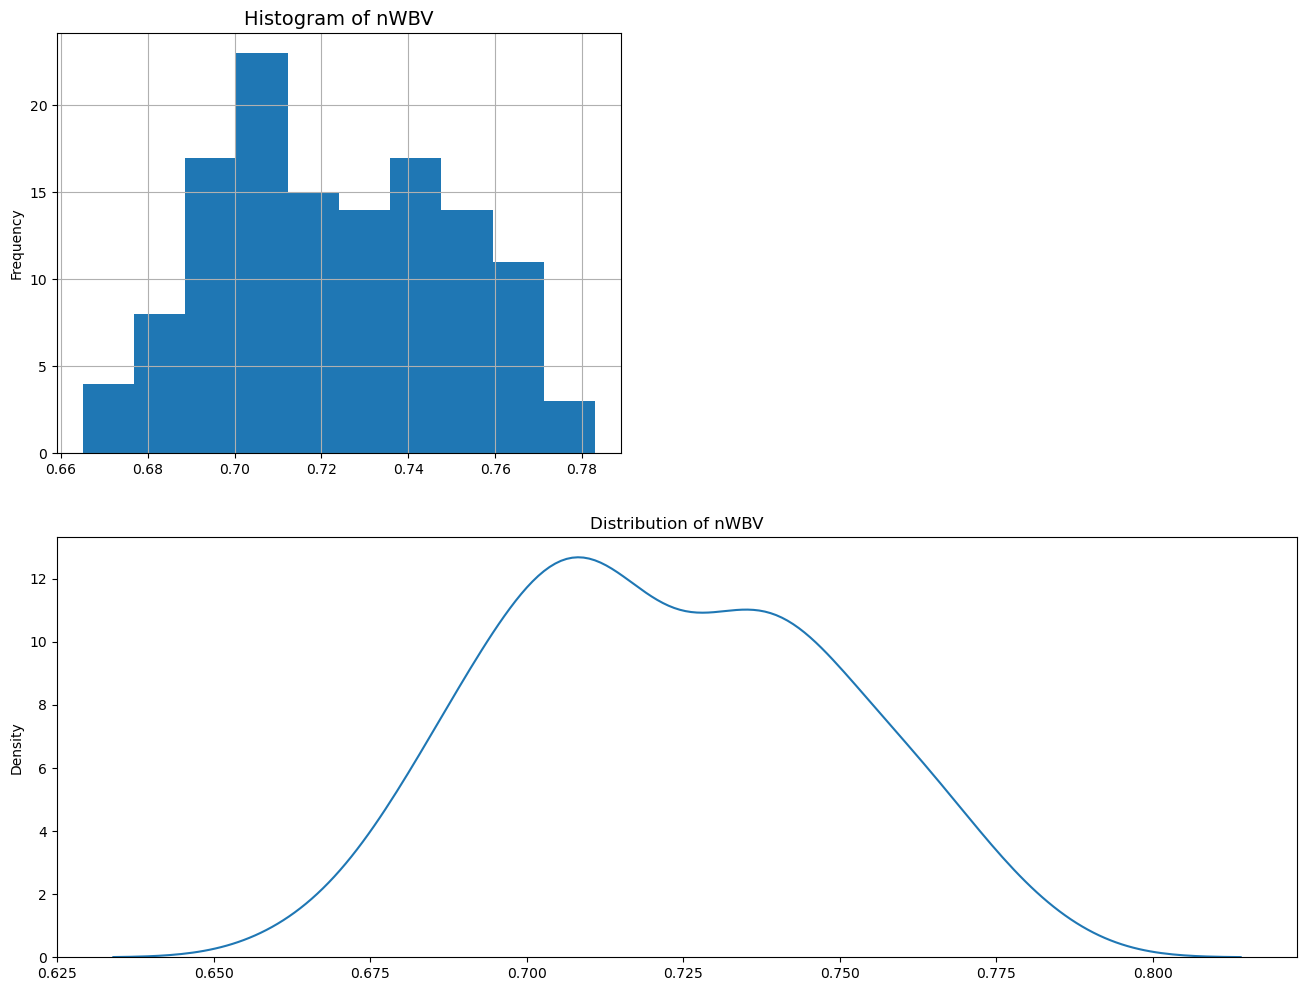

count    74.000000
mean      0.730446
std       0.025915
min       0.683000
25%       0.708000
50%       0.733000
75%       0.751000
max       0.777000
Name: nWBV, dtype: float64

In [30]:
# From the univariate analysis, we can see that females with dementia commonly have a brain volume of 0.70 +/- (x)

univariate_mul('nWBV')
female_data['nWBV'].describe()

In [34]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
# https://www.pluralsight.com/resources/blog/guides/importing-image-data-into-numpy-arrays

# test to see if we can open an image and set the variable data as the array
img_path = 'Datasets/Moderate_Demented/moderate.jpg' 
image = Image.open(img_path)
data = asarray(image)


# test: 
print(image.format, image.size, image.mode)
print(data.size, data)
print(type(data)) #check to see if this is now an array 

JPEG (128, 128) L
16384 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In the previous code cell, we tested to see if the moderate.jpg image opens. We utilzied the python Python Imaging Library (PIL) to do this. We first retrieved the image path and then used that path to process it through Image.open(). This method essentially opens the file and reads its components. Following this step, we wanted to convert that image into an array. Now that we know this works, we now want to turn the folders, which contain the different ranges of demented data, themselves into arrays. 

In [43]:
# about os.listdir: https://www.geeksforgeeks.org/python-os-listdir-method/

mild_demented = 'Datasets/Mild_Demented'
img_files = os.listdir(mild_demented)
mild_demented_array = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(mild_demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        mild_demented_array.append(img_array)
mild_demented_array = np.array(mild_demented_array)

print("Processed Mild Demented", len(mild_demented_array), "images.")
print("Processed Mild Demented","with shape:", mild_demented_array.shape)

Very_Mild_Demented = 'Datasets/Very_Mild_Demented'
img_files = os.listdir(Very_Mild_Demented)
Very_Mild_Demented_array = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Very_Mild_Demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Very_Mild_Demented_array.append(img_array)
Very_Mild_Demented_array = np.array(Very_Mild_Demented_array)

print("Processed Very Mild Demented", len(Very_Mild_Demented_array), "images.")
print("Processed Very Mild Demented", "with shape:", Very_Mild_Demented_array.shape)


Moderate_Demeneted = 'Datasets/Moderate_Demented'
img_files = os.listdir(Moderate_Demeneted)
Moderate_Demented_array = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Moderate_Demeneted, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Moderate_Demented_array.append(img_array)
Moderate_Demented_array = np.array(Moderate_Demented_array)

print("Processed Moderate Demented", len(Moderate_Demented_array), "images.")
print("Processed Moderate Demented", "with shape:", Moderate_Demented_array.shape)


Non_Demented = 'Datasets/Non_Demented'
img_files = os.listdir(Non_Demented)
Non_Demented_array = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Non_Demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Non_Demented_array.append(img_array)
Non_Demented_array = np.array(Non_Demented_array)

print("Processed Non Demented", len(Non_Demented_array), "images.")
print("Processed Non Demented", "with shape:", Non_Demented_array.shape)

Processed Mild Demented 895 images.
Processed Mild Demented with shape: (895, 128, 128, 3)
Processed Very Mild Demented 2239 images.
Processed Very Mild Demented with shape: (2239, 128, 128, 3)
Processed Moderate Demented 64 images.
Processed Moderate Demented with shape: (64, 128, 128, 3)
Processed Non Demented 2418 images.
Processed Non Demented with shape: (2418, 128, 128, 3)


In [44]:
all_demented_datasets_array = np.concatenate((mild_demented_array, Non_Demented_array, Moderate_Demented_array, Very_Mild_Demented_array), axis=0)
is_mild_demented_array = isinstance(all_demented_datasets_array, np.ndarray) # make sure all_demented_datasets_array is an array 
print("all_demented_datasets_array shape", all_demented_datasets_array.shape)

all_demented_datasets_array shape (5616, 128, 128, 3)


In [48]:
# https://medium.com/codex/learning-image-classification-with-cnn-using-tensorflow-4875fdd3ce62
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_demented_datasets_array, test_size=0.33,random_state=42)

ValueError: not enough values to unpack (expected 4, got 2)

### Hugging Face

In [45]:
# https://huggingface.co/docs/datasets/en/loading
from datasets import load_dataset
dataset = load_dataset("enriqfatima/alzheimer_datset") #different folders, not images all in one folder. 
print(dataset.keys())

Resolving data files:   0%|          | 0/364 [00:00<?, ?it/s]

dict_keys(['train'])


In [46]:
train_test_dataset = load_dataset("enriqfatima/test.train")
print(train_test_dataset.keys())

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

dict_keys(['train'])


### CNN video


https://www.youtube.com/watch?v=jztwpsIzEGc
Install Depedencies and Setup

In [ ]:
#conda install tensorflow tensorflow-gpu opencv-python matplotlib

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow-gpu
  - opencv-python

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/noarch
  - https://conda.anaconda.org/conda-forge/osx-64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

2024-06-01 13:08:25.829342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#avoids memory issues
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'Datasets'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# os.listdir(os.path.join(data_dir, 'Moderate_Demented'))
# # under 9 kb, maybe get rid of it


# x = 0
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             x+=1
#     print(x)
#             # os.remove(image_path)
#15 min in cideo

In [ ]:
#loading data
data = tf.keras.utils.image_dataset_from_directory('Datasets')
#createing a dataset, sort it into one variable
data_iterator = data.as_numpy_iterator()
#grabs that data, iterates through the files
batch = data_iterator.next()


Found 5537 files belonging to 4 classes.


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('Datasets')
data = tf.keras.utils.image_dataset_from_directory('Datasets')
batch = data_iterator.next()

Found 6433 files belonging to 5 classes.
Found 6433 files belonging to 5 classes.


In [ ]:
#class 1 = second 
#Class 0 = first
batch[1]
batch[0].shape

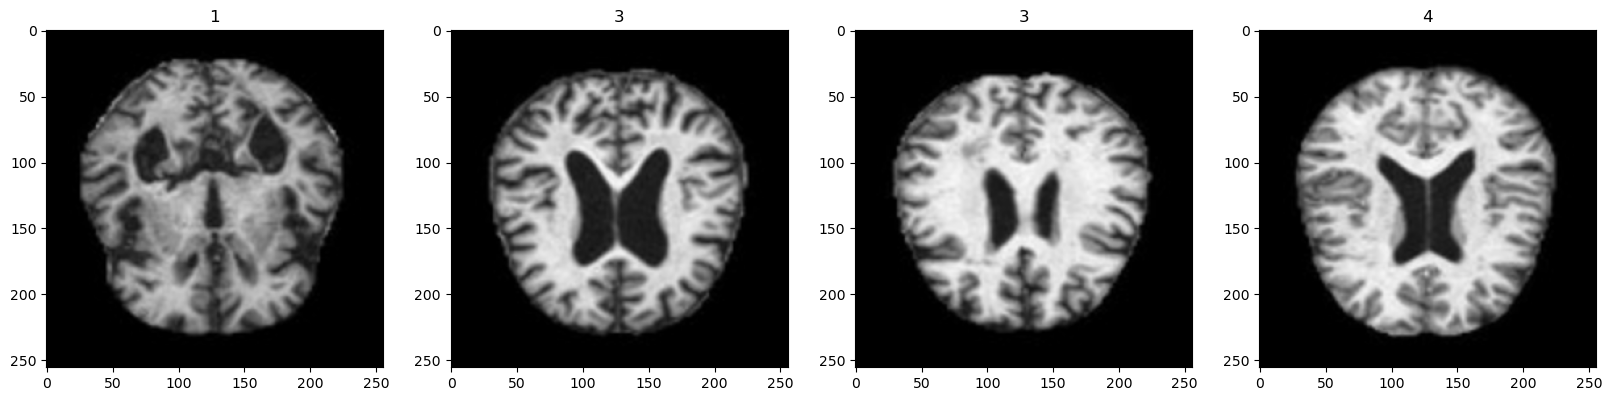

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
#scales the data, make it easier to process
data.as_numpy_iterator().next();

In [ ]:
len(data)

202

In [ ]:
#allocating data
train_size = int(len(data)*.7)
    #70% of the data for training
val_size = int(len(data)*.2)
    #used during training
test_size = int(len(data)*.1)+1
    #used post training
test_size + val_size + train_size

202

In [ ]:
#data was shuffled earlier, between the 4 folders
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

141

###Deep learning part

In [ ]:
#import functional? 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [ ]:
#Creating layers

#1st layer, must have input
#16 filters, scan and infer a output
#filter size is (3,3) pixels
#stride of 1: moves one pixel at a time
#relu activation, pass it throughh a function, preserve pos value,s anything that is neg is 0
#Maxpolling:2D: reduce the image data by half
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten, condese it into 1 dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compile 
#optimizer, loss: this should be diff, 
#tf.optimizers. (thers alot of htem)
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
#actual training section
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#model.fit : training, model.predict: prediction
#train: 4 batch fo 32 img, epoch: how many times we run the traiing fata
#val: evaluating our model, callback: do tensorboard_callback

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
141/141 [==============================] - 110s 763ms/step - loss: -1456577.7500 - accuracy: 0.1407 - val_loss: -10796079.0000 - val_accuracy: 0.1305
Epoch 2/20
141/141 [==============================] - 111s 787ms/step - loss: -220588784.0000 - accuracy: 0.1410 - val_loss: -778997184.0000 - val_accuracy: 0.1258
Epoch 3/20
141/141 [==============================] - 111s 782ms/step - loss: -3397764096.0000 - accuracy: 0.1416 - val_loss: -8057587200.0000 - val_accuracy: 0.1312
Epoch 4/20
141/141 [==============================] - 106s 748ms/step - loss: -20350697472.0000 - accuracy: 0.1427 - val_loss: -38250971136.0000 - val_accuracy: 0.1227
Epoch 5/20
141/141 [==============================] - 106s 751ms/step - loss: -76300967936.0000 - accuracy: 0.1385 - val_loss: -126595588096.0000 - val_accuracy: 0.1250
Epoch 6/20
141/141 [==============================] - 108s 762ms/step - loss: -211925762048.0000 - accuracy: 0.1410 - val_loss: -320879820800.0000 - val_accuracy: 0.1227
Ep

In [ ]:

batch[1]

array([1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 0, 3, 4, 3, 4, 4, 3, 3, 4,
       4, 0, 3, 4, 4, 4, 3, 4, 0, 4], dtype=int32)